In [1]:
import jax
from jax.config import config
config.update("jax_enable_x64", True)

2022-09-12 17:05:48.751104: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-12 17:05:49.292731: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-12 17:05:49.378172: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


In [2]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import moscot.plotting as mpl

In [ ]:
ad = sc.read_h5ad('/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_2022.h5ad')

In [43]:
ad.obsm["X_pca"] == bdata.obsm["X_pca"]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [41]:
sc.tl.umap(ad)

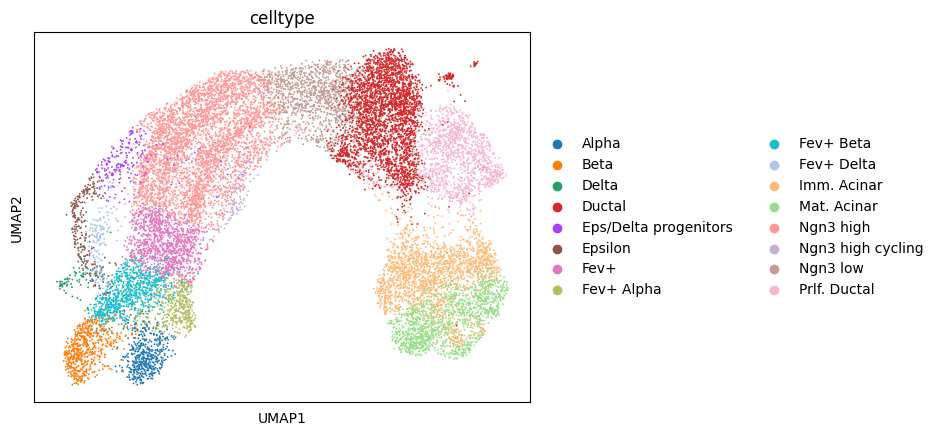

In [42]:
sc.pl.umap(adata,color="celltype")

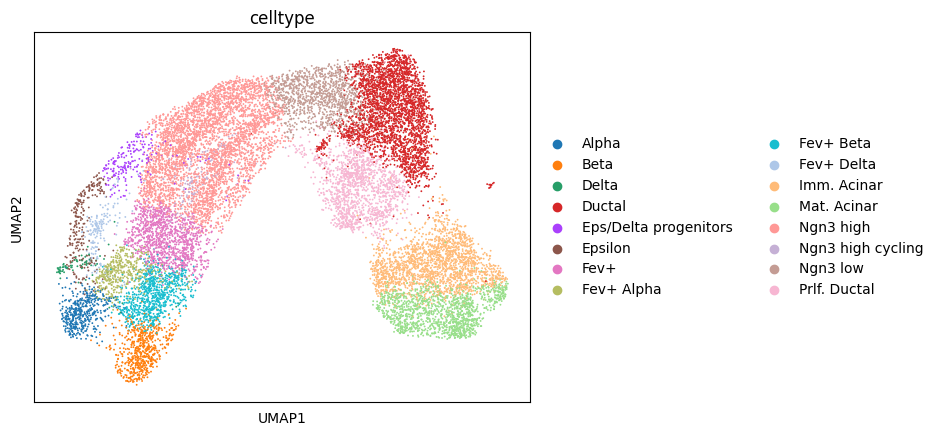

In [10]:
sc.pl.umap(ad, color="celltype")

In [15]:
ad.uns["neighbors_wnn"]

{'connectivities_key': 'connectivities',
 'distances_key': 'distances',
 'params': {'eps': 0.0001,
  'method': 'umap',
  'metric': 'correlation',
  'n_multineighbors': 200,
  'n_neighbors': 16,
  'n_pcs': {'ATAC': -1, 'GEX': 30},
  'random_state': 42,
  'use_rep': {'ATAC': 'lsi_red2', 'GEX': -1}}}

In [16]:
bdata = sc.read_h5ad("/home/icb/dominik.klein/data/tmp_adata.h5ad")

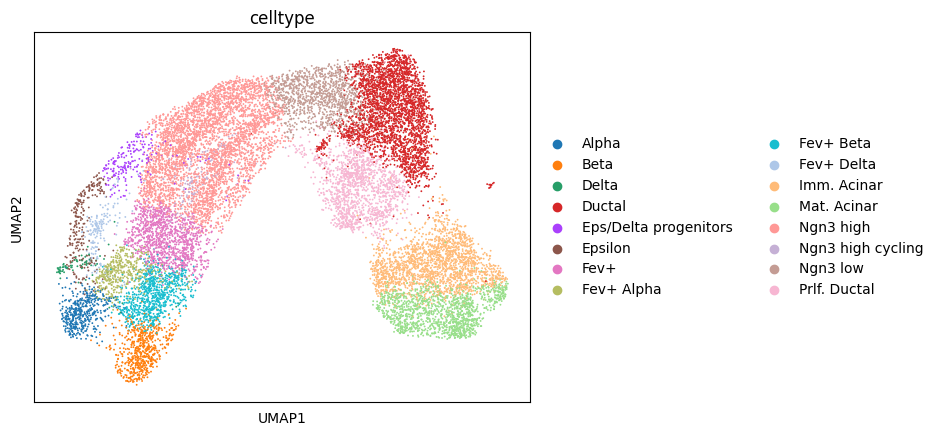

In [19]:
sc.pl.umap(bdata,color="celltype")

In [20]:
sc.tl.umap(bdata)

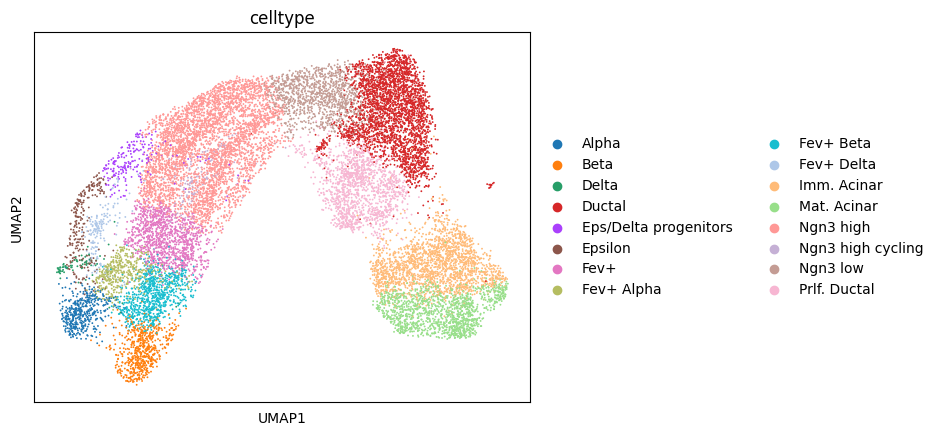

In [21]:
sc.pl.umap(bdata,color="celltype")

In [31]:
bdata.uns["neighbors"]

OverloadedDict, wrapping:
	{'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'method': 'umap', 'metric': 'correlation', 'n_neighbors': 16, 'n_pcs': 30, 'random_state': 0}}
With overloaded keys:
	['connectivities', 'distances'].

In [40]:
ad.uns["neighbors"] = bdata.uns["neighbors"]

In [30]:
(ad.obsp["distances"] != bdata.obsp["distances"]).sum()

0

In [14]:
sc.tl.umap(ad, neighbors_key="neighbors_wnn")

TypeError: unhashable type: 'dict'

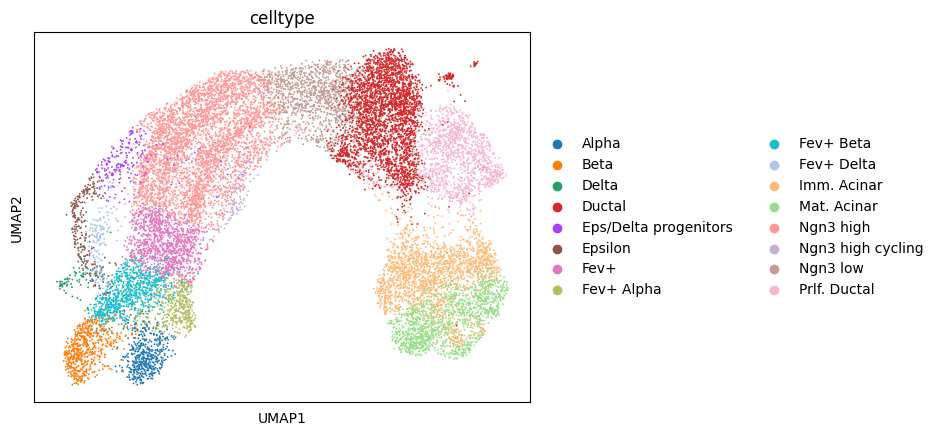

In [12]:
sc.pl.umap(adata, color="celltype")

In [5]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_multiome_2022_multiVI_embedding.h5ad")

In [7]:
sc.tl.umap(adata)

/home/icb/dominik.klein/miniconda3/envs/jax_gpu2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


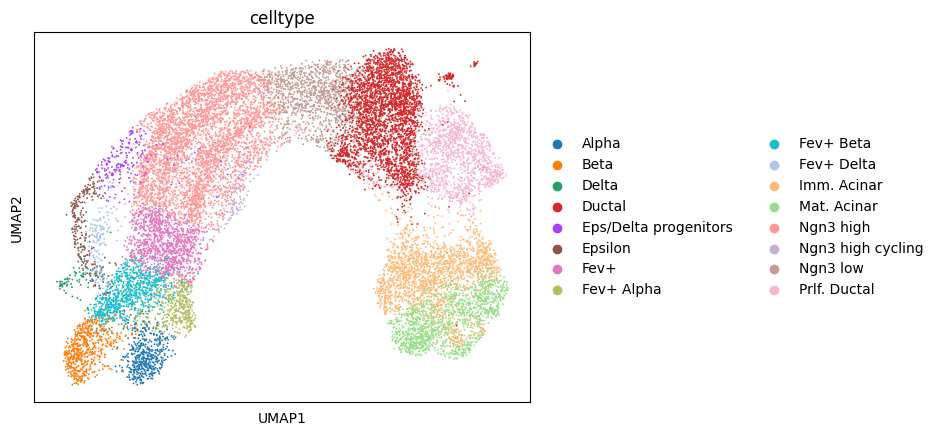

In [9]:
sc.pl.umap(adata, color="celltype")

In [16]:
sc.tl.leiden(adata, res=2)

ImportError: Please install the leiden algorithm: `conda install -c conda-forge leidenalg` or `pip3 install leidenalg`.

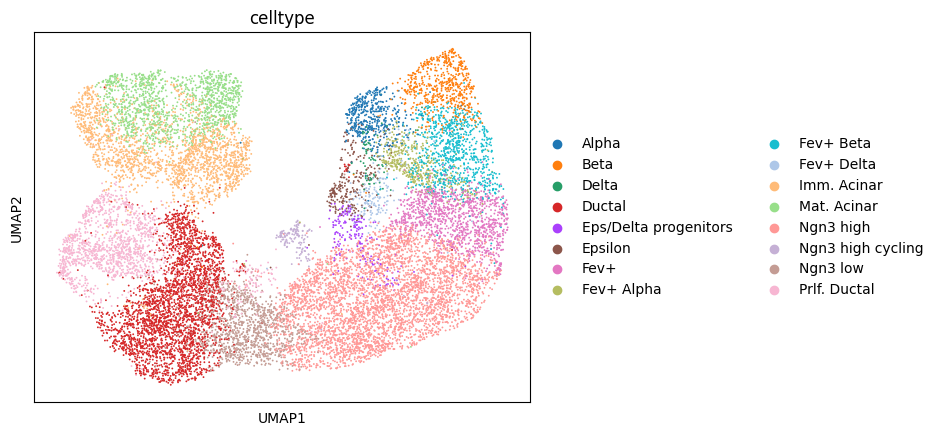

In [9]:
sc.pl.umap(adata,color="celltype")

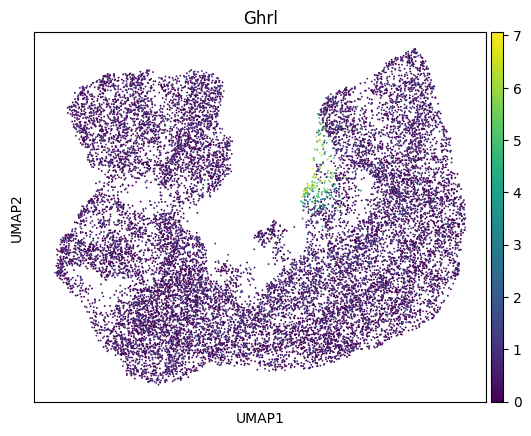

In [14]:
sc.pl.umap(adata, color="Ghrl")

In [4]:
sc.tl.umap(adata, neighbors_key="neighbors")

/home/icb/dominik.klein/miniconda3/envs/jax_gpu2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


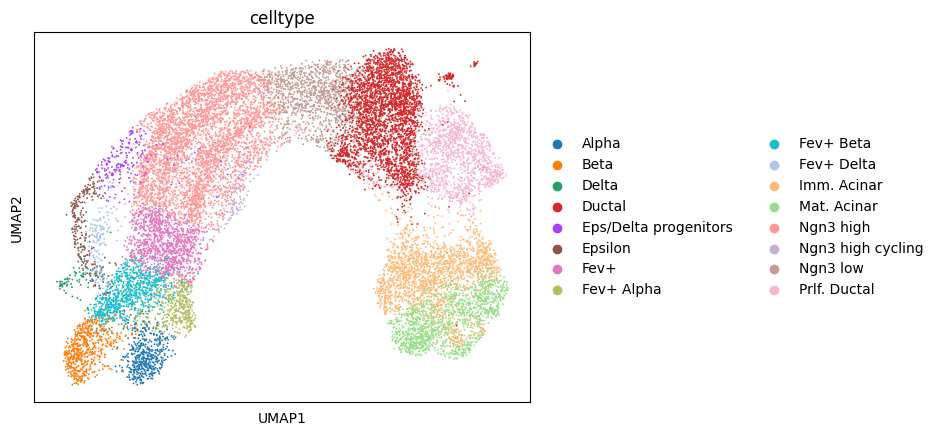

In [6]:
sc.pl.umap(adata,color="celltype")

In [4]:
endocrine_celltypes = [
    "Ngn3 low",
    "Ngn3 high",
    "Ngn3 high cycling",
    "Fev+",
    "Fev+ Alpha",
    "Fev+ Beta",
    "Fev+ Delta",
    "Eps/Delta progenitors",
    "Alpha",
    "Beta",
    "Delta",
    "Epsilon"
]

In [5]:
adata_red = adata[adata.obs["celltype"].isin(endocrine_celltypes)]

In [6]:
adata_removed = adata[~adata.obs["celltype"].isin(endocrine_celltypes)]

In [7]:
adata_removed.obs["celltype"].cat.categories

Index(['Ductal', 'Imm. Acinar', 'Mat. Acinar', 'Prlf. Ductal'], dtype='object')

In [8]:
adata_red.obs["celltype"].cat.categories

Index(['Alpha', 'Beta', 'Delta', 'Eps/Delta progenitors', 'Epsilon', 'Fev+',
       'Fev+ Alpha', 'Fev+ Beta', 'Fev+ Delta', 'Ngn3 high',
       'Ngn3 high cycling', 'Ngn3 low'],
      dtype='object')

In [9]:
adata = adata_red

In [10]:
adata.obs['time'] = adata.obs.apply(lambda x: 14.5 if x["sample"]=="E14.5" else 15.5, axis=1)

/tmp/ipykernel_14139/1655554008.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['time'] = adata.obs.apply(lambda x: 14.5 if x["sample"]=="E14.5" else 15.5, axis=1)


In [11]:
adata

AnnData object with n_obs × n_vars = 9365 × 200535
    obs: 'batch_id', 'modality', '_scvi_batch', 'celltype', 'sample', 'time'
    var: 'n_cells', 'feature_type'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'celltype_colors', 'multi_vi', 'sample_colors', 'umap'
    obsm: 'X_multi_vi', 'X_umap'
    obsp: 'multi_vi_connectivities', 'multi_vi_distances'

# PCA on GEX+LSI space

In [12]:
tp0 = TemporalProblem(adata)
tp0 = tp0.score_genes_for_marginals(gene_set_proliferation="mouse", gene_set_apoptosis="mouse")
tp0 = tp0.prepare("time", joint_attr="X_multi_vi")

/home/icb/dominik.klein/miniconda3/envs/jax_gpu2/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/icb/dominik.klein/miniconda3/envs/jax_gpu2/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [13]:
tp0 = tp0.solve(epsilon=1e-2, scale_cost="mean")

/home/icb/dominik.klein/git_repos/moscot/moscot/solvers/_base_solver.py:163: UserWarning: Solver did not converge
  warnings.warn("Solver did not converge")


In [14]:
ct_desc = tp0.cell_transition(start=14.5, end=15.5, early_annotation="celltype", late_annotation="celltype", forward=True)

In [15]:
tp0[14.5, 15.5].solution

OTTOutput[shape=(5539, 3826), cost=57079.9503, converged=False]

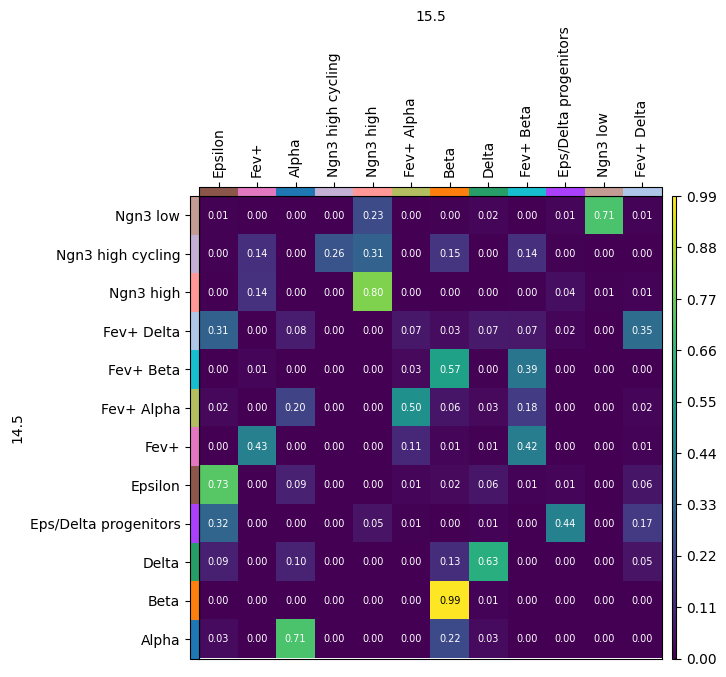

In [18]:
mpl.cell_transition(tp0, dpi=100, fontsize=7)

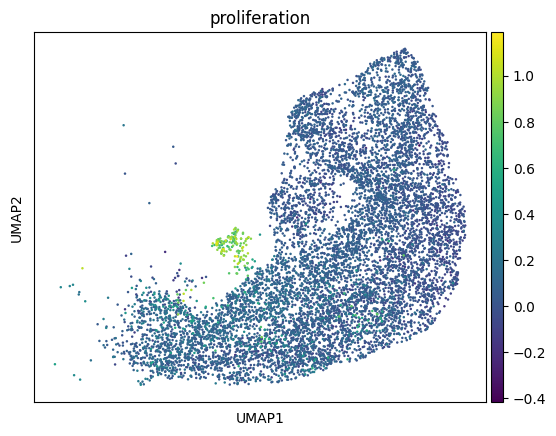

In [19]:
sc.pl.umap(adata, color="proliferation")

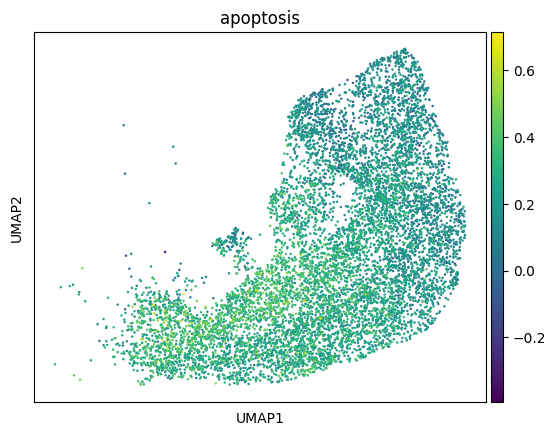

In [20]:
sc.pl.umap(adata, color="apoptosis")

In [26]:
tp0.push(14.5, 15.5, data="celltype", subset="Fev+ Alpha")

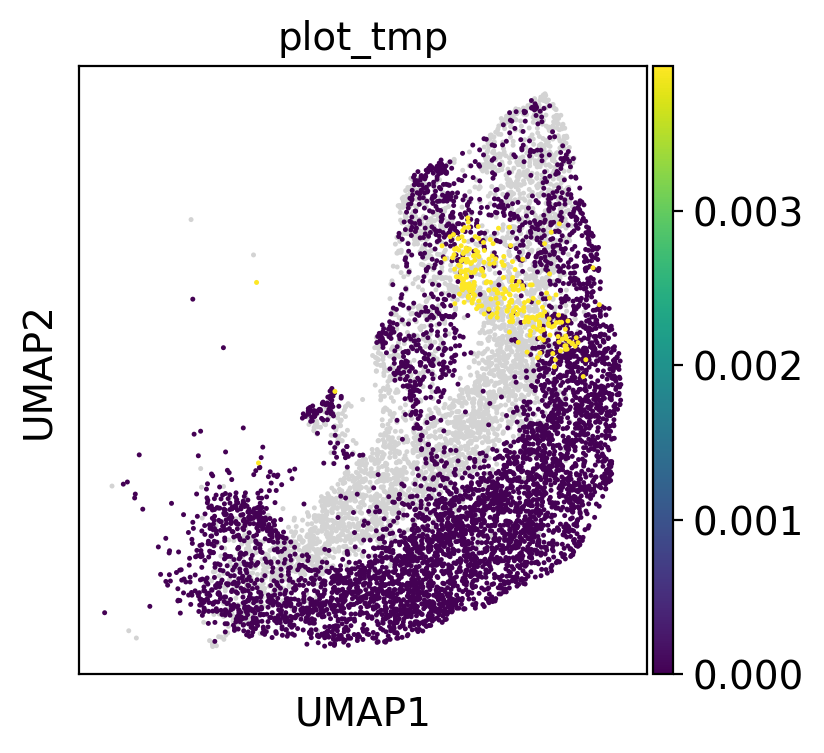

In [27]:
mpl.push(tp0, time_points=[14.5])

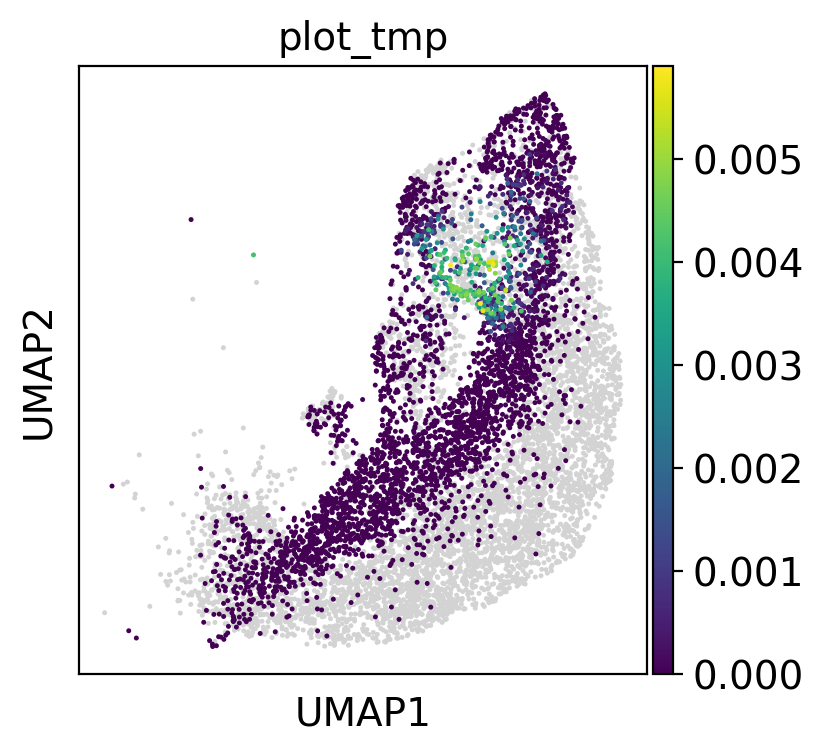

In [28]:
mpl.push(tp0, time_points=[15.5])

In [29]:
tp0.push(14.5, 15.5, data="celltype", subset="Eps/Delta progenitors")

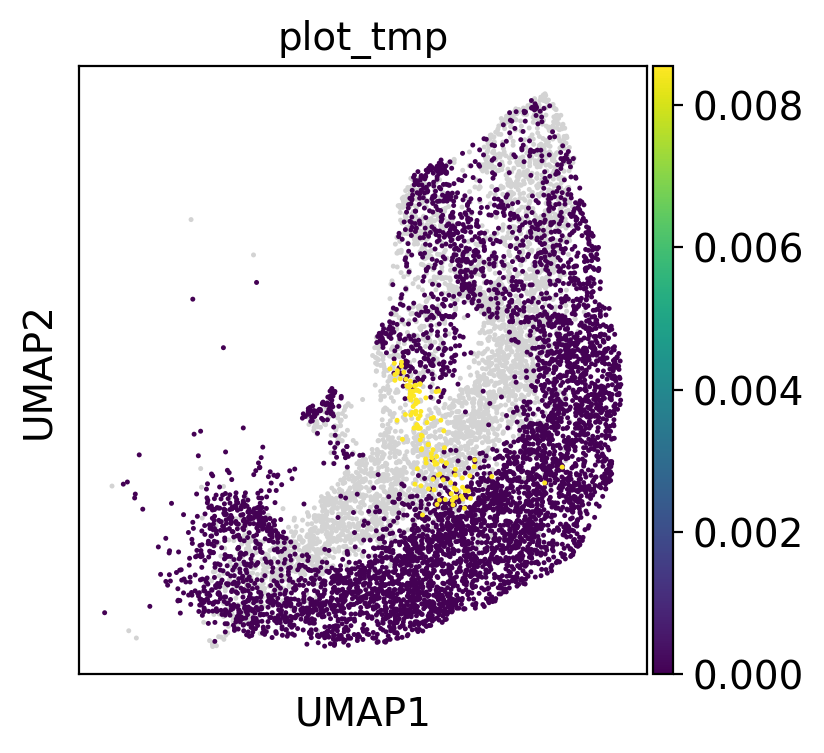

In [30]:
mpl.push(tp0, time_points=[14.5])

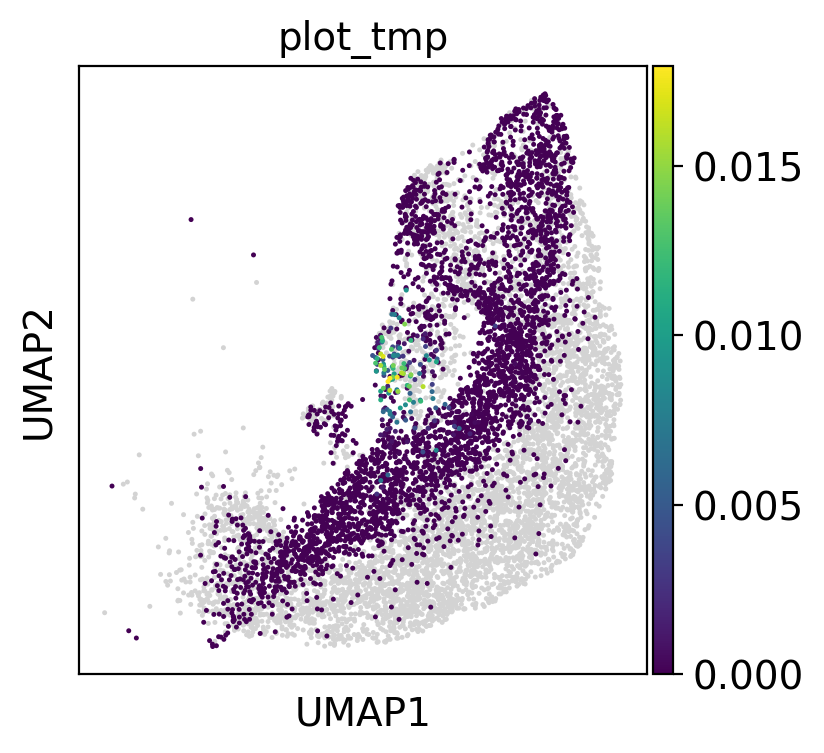

In [31]:
mpl.push(tp0, time_points=[15.5])

In [32]:
tp0.push(14.5, 15.5, data="celltype", subset="Epsilon")

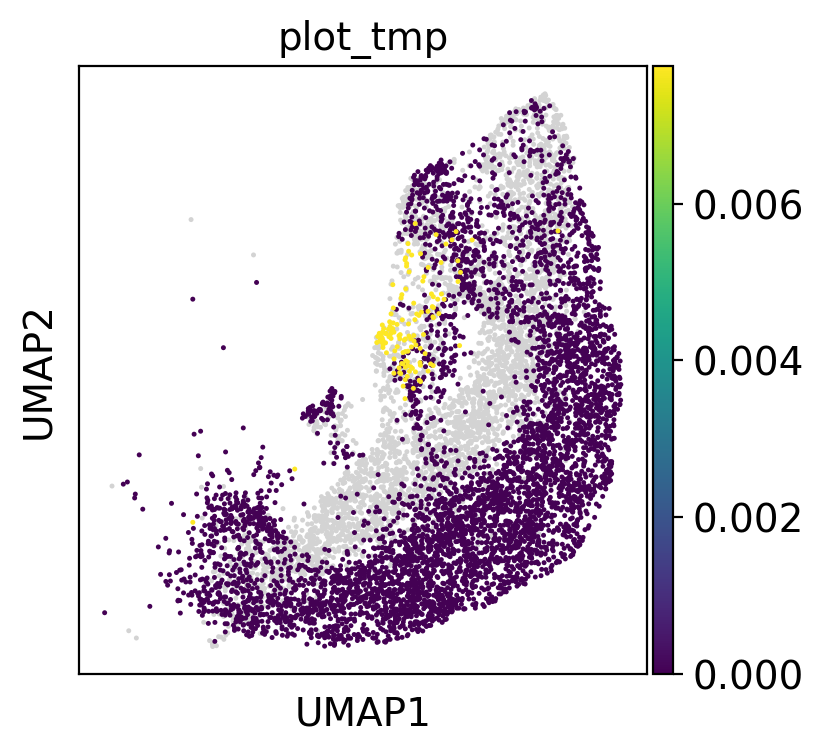

In [33]:
mpl.push(tp0, time_points=[14.5])

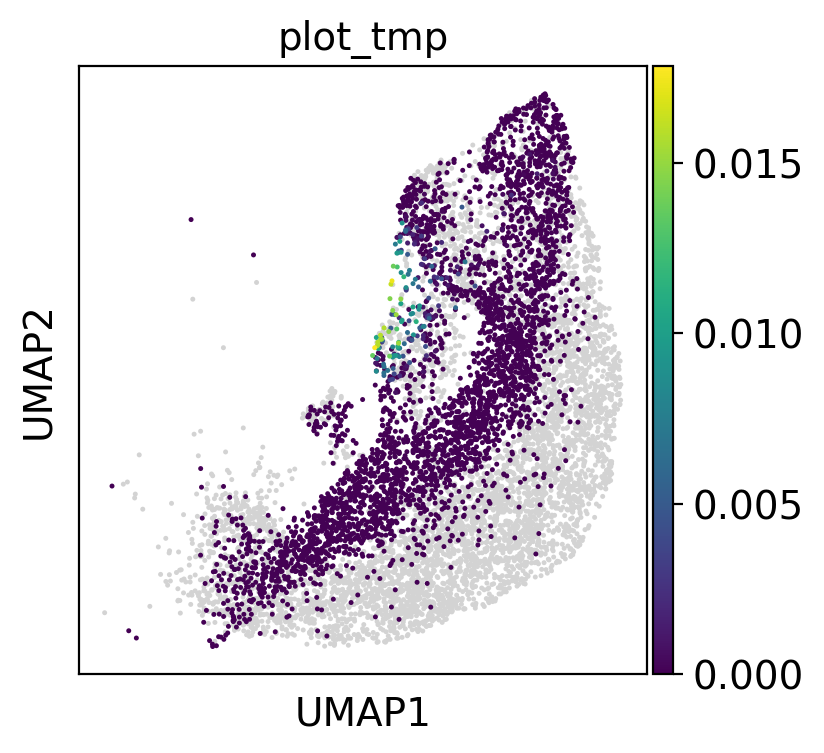

In [34]:
mpl.push(tp0, time_points=[15.5])

In [35]:
tp0.pull(14.5, 15.5, data="celltype", subset="Eps/Delta progenitors")

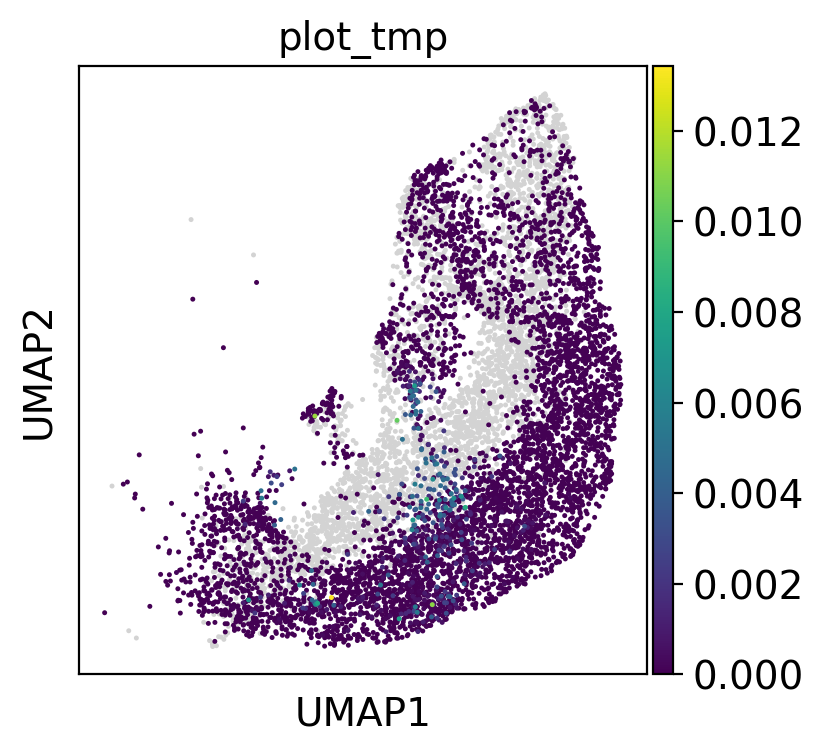

In [36]:
mpl.pull(tp0, time_points=[14.5])

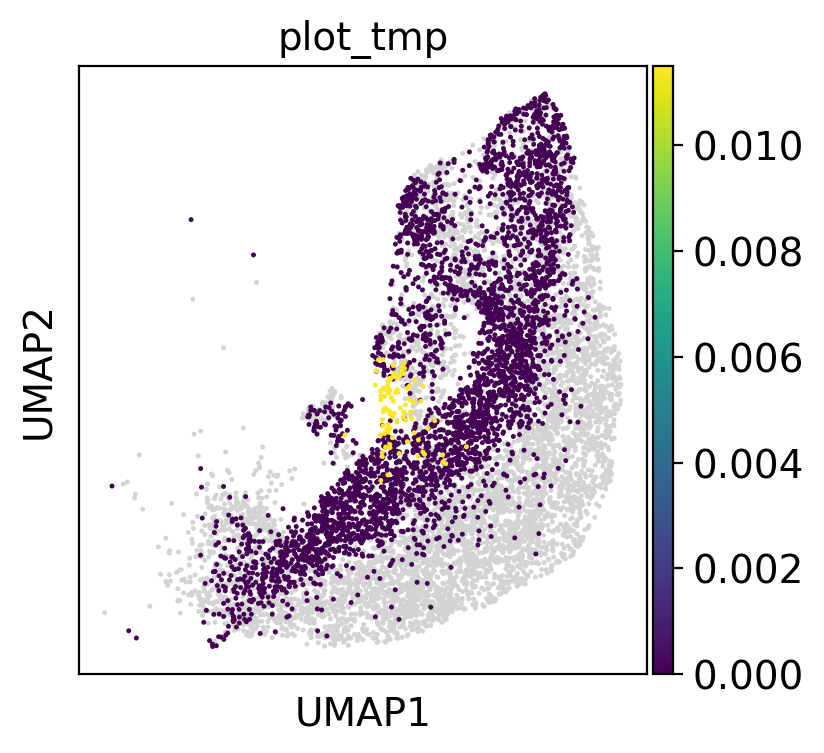

In [37]:
mpl.pull(tp0, time_points=[15.5])

In [38]:
adata

AnnData object with n_obs × n_vars = 9365 × 200535
    obs: 'batch_id', 'modality', '_scvi_batch', 'celltype', 'sample', 'time', 'proliferation', 'apoptosis', 'growth_rates', 'push', 'plot_tmp', 'pull'
    var: 'n_cells', 'feature_type'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'celltype_colors', 'multi_vi', 'sample_colors', 'umap', 'moscot_results'
    obsm: 'X_multi_vi', 'X_umap'
    obsp: 'multi_vi_connectivities', 'multi_vi_distances'

In [2]:
import scanpy as sc

In [ ]:
adata_gex = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_2022.h5ad")

In [ ]:
adata_gex